<a href="https://colab.research.google.com/github/Nik-Kras/ToMnet-N/blob/main/PyGame_render.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setting Drawing Functions

In [647]:
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [648]:
import sys
 
print("User Current Version:-", sys.version)

User Current Version:- 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]


In [649]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys

# set SDL to use the dummy NULL video driver, 
#   so it doesn't need a windowing system.
os.environ["SDL_VIDEODRIVER"] = "dummy"

## 1.1 Testing Drawing

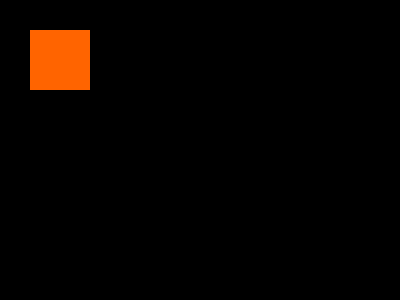

In [650]:
import pygame

pygame.init()
screen = pygame.display.set_mode((400, 300))
done = False
is_blue = True
x = 30
y = 30

for event in pygame.event.get():
        if event.type == pygame.QUIT:
                done = True

color = (255, 100, 0)
pygame.draw.rect(screen, color, pygame.Rect(x, y, 60, 60))

pygame.display.flip()

#convert image so it can be displayed in OpenCV
view = pygame.surfarray.array3d(screen)

#  convert from (width, height, channel) to (height, width, channel)
view = view.transpose([1, 0, 2])

#  convert from rgb to bgr
img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

#Display image, clear cell every 0.5 seconds
cv2_imshow(img_bgr)

## 1.2 Functions to Draw simple figures

In [651]:
from math import sin, cos, pi, radians
from sys import exit as _exit

def makeTriangle(scale, internalAngle, rotation):
    #define the points in a uint space
    ia = (radians(internalAngle) * 2) - 1
    p1 = (0, -1)
    p2 = (cos(ia), sin(ia))
    p3 = (cos(ia) * -1, sin(ia))

    #rotate the points
    ra = radians(rotation)
    rp1x = p1[0] * cos(ra) - p1[1] * sin(ra)
    rp1y = p1[0] * sin(ra) + p1[1] * cos(ra)                 
    rp2x = p2[0] * cos(ra) - p2[1] * sin(ra)
    rp2y = p2[0] * sin(ra) + p2[1] * cos(ra)                        
    rp3x = p3[0] * cos(ra) - p3[1] * sin(ra)                         
    rp3y = p3[0] * sin(ra) + p3[1] * cos(ra)
    rp1 = ( rp1x, rp1y )
    rp2 = ( rp2x, rp2y )
    rp3 = ( rp3x, rp3y )

    #scale the points 
    sp1 = [rp1[0] * scale, rp1[1] * scale]
    sp2 = [rp2[0] * scale, rp2[1] * scale]
    sp3 = [rp3[0] * scale, rp3[1] * scale]

    return sp1, sp2, sp3

## 1.3 Function to draw map

In [652]:
def draw_cool_map(WIDTH, HEIGHT, simple_map, actions):

  STEP = 30

  pygame.init()
  screen = pygame.display.set_mode((STEP*(WIDTH+2), STEP*(HEIGHT+2)))
  done = False
  is_blue = True
  x = 30
  y = 30

  # color of background
  color = (51, 51, 51)
    
  # Changing surface color
  screen.fill(color)

  # color of path
  # color = (255, 250, 205) # LemonChiffon
  color = (255, 250, 225)

  print("simple_map: ", simple_map)
  print("simple_map[0][0]: ", simple_map[0][0])

  # Create path
  for i in range(WIDTH):
    for j in range(HEIGHT):
      if simple_map[i][j] != 0:
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP, (j+1)*STEP, 
                                                    STEP, STEP))
        
  color = (0, 0, 0)      
  # Create borders
  pygame.draw.rect(screen, color, pygame.Rect(0, 0, STEP, STEP*(WIDTH+2)))
  pygame.draw.rect(screen, color, pygame.Rect(0, 0, STEP*(HEIGHT+2), STEP))
  pygame.draw.rect(screen, color, pygame.Rect(0, STEP*(HEIGHT+1), STEP*(WIDTH+2), STEP))
  pygame.draw.rect(screen, color, pygame.Rect(STEP*(WIDTH+1), 0, STEP, STEP*(WIDTH+2)))

  color = (255,0,255)
  player_postition = []
  # Create player
  for i in range(WIDTH):
    for j in range(HEIGHT):
      if simple_map[i][j] == 10:
        pygame.draw.circle(screen, color, center=((i+1)*STEP+STEP/2, (j+1)*STEP+STEP/2), 
                           radius = STEP/2)
        player_postition = [(i+1)*STEP, (j+1)*STEP]
        
        
  #q = STEP/3
  q = 0
  r = 0
  # Create goals
  for i in range(WIDTH):
    for j in range(HEIGHT):
      if simple_map[i][j] == 2:
        #color = (255,0,0)  # Red
        color = (230,0,0)
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP + q/2, (j+1)*STEP + q/2, 
                                                    STEP - q, STEP - q), border_radius=r)
      elif simple_map[i][j] == 3:
        #color = (0,255,0)  # Green
        color = (0,230,0)
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP + q/2, (j+1)*STEP + q/2, 
                                                    STEP - q, STEP - q), border_radius=r)
        
      elif simple_map[i][j] == 4:
        #color = (0,255,255) # Cyan
        color = (0,230,230) # Teal/Cyan
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP + q/2, (j+1)*STEP + q/2, 
                                                    STEP - q, STEP - q), border_radius=r)
        
      elif simple_map[i][j] == 5:
        # color = (0,0,255)  # Blue
        color = (0,0,230)
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP + q/2, (j+1)*STEP + q/2, 
                                                    STEP - q, STEP - q), border_radius=r)

  color = (128,0,0)
  # Create trajectory
  for action in actions:
    if action == 1:
      new_y = player_postition[0] 
      new_x = player_postition[1]
      line1, line2, line3 = makeTriangle(STEP/4, 60, 270)

    elif action == 2:
      new_y = player_postition[0]
      new_x = player_postition[1] + STEP
      line1, line2, line3 = makeTriangle(STEP/4, 60, 180)

    elif action == 3:
      new_y = player_postition[0] + STEP
      new_x = player_postition[1] 
      line1, line2, line3 = makeTriangle(STEP/4, 60, 90)
    elif action == 4:
      new_y = player_postition[0] - STEP
      new_x = player_postition[1]
      line1, line2, line3 = makeTriangle(STEP/4, 60, 0)
    
    
    line1[0] = line1[0] + new_y + STEP/2
    line1[1] = line1[1] + new_x + STEP/2
    line2[0] = line2[0] + new_y + STEP/2
    line2[1] = line2[1] + new_x + STEP/2
    line3[0] = line3[0] + new_y + STEP/2
    line3[1] = line3[1] + new_x + STEP/2
    pygame.draw.lines(screen, color, points=[line3, line1, line2], width=3, closed=False)
    player_postition = [new_y, new_x]

  view = pygame.surfarray.array3d(screen)
  #  convert from (width, height, channel) to (height, width, channel)
  #view = view.transpose([1, 0, 2])
  #  convert from rgb to bgr
  img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
  #Display image, clear cell every 0.5 seconds
  cv2_imshow(img_bgr)

## 1.5 Testing Map Drawing

21
[2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3]
simple_map:  [[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 5, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0

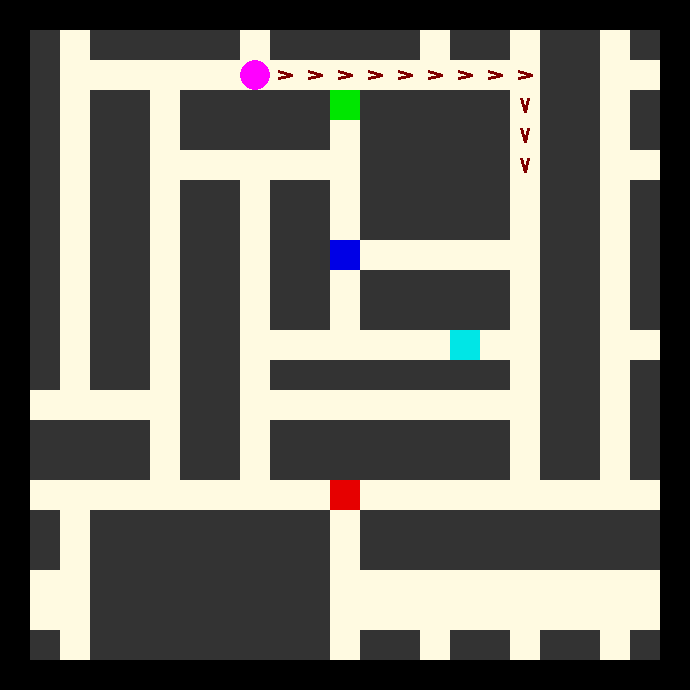

In [653]:
ROWS = 21
COLS = 21

# env = GridWorld(tot_row=ROWS, tot_col=COLS, consume_goals=1, shaffle=False)
# env.reset()
# simple_map = env.draw_map()
# print(simple_map)

old_map = [[ 0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0],
 [ 0,1,1,1,1,1,1,10,1,1,1,1,1,1,1,1,1,0,0,1,1],
 [ 0,1,0,0,1,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0],
 [ 0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0],
 [ 0,1,0,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1],
 [ 0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0],
 [ 0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0],
 [ 0,1,0,0,1,0,0,1,0,0,5,1,1,1,1,1,1,0,0,1,0],
 [ 0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0],
 [ 0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0],
 [ 0,1,0,0,1,0,0,1,1,1,1,1,1,1,4,1,1,0,0,1,1],
 [ 0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0],
 [ 1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0],
 [ 0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0],
 [ 0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0],
 [ 1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1],
 [ 0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
 [ 0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
 [ 1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1],
 [ 1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1],
 [ 0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0]]
actions = [2] * 9 + [3, 3, 3]
print(len(old_map))

print(actions)

draw_cool_map(ROWS, COLS, old_map, actions)

## 1.6 Function to draw map from pandas

In [654]:
def draw_pandas_map(WIDTH, HEIGHT, pandas_map, initial, predicted):

  STEP = 30

  pygame.init()
  screen = pygame.display.set_mode((STEP*(WIDTH+2), STEP*(HEIGHT+2)))
  done = False
  is_blue = True
  x = 30
  y = 30

  # --------------------------------------------------------
  # 1. Draw initial trajectory + predict
  # --------------------------------------------------------

  # color of background
  color = (51, 51, 51)
    
  # Changing surface color
  screen.fill(color)

  # color of path
  # color = (255, 250, 205) # LemonChiffon
  color = (255, 250, 225)

  simple_map = np.array(pandas_map)

  # Create path
  for i in range(WIDTH):
    for j in range(HEIGHT):
      if simple_map[i, j] != 1:
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP, (j+1)*STEP, 
                                                    STEP, STEP))
        
  color = (0, 0, 0)      
  # Create borders
  pygame.draw.rect(screen, color, pygame.Rect(0, 0, STEP, STEP*(WIDTH+2)))
  pygame.draw.rect(screen, color, pygame.Rect(0, 0, STEP*(HEIGHT+2), STEP))
  pygame.draw.rect(screen, color, pygame.Rect(0, STEP*(HEIGHT+1), STEP*(WIDTH+2), STEP))
  pygame.draw.rect(screen, color, pygame.Rect(STEP*(WIDTH+1), 0, STEP, STEP*(WIDTH+2)))

  color = (255,0,255)
  player_postition = []
  # Create player
  for i in range(WIDTH):
    for j in range(HEIGHT):
      if simple_map[i][j] == 10:
        pygame.draw.circle(screen, color, center=(i*STEP+STEP/2, (j+1)*STEP+STEP/2), 
                           radius = STEP/2)
        player_postition = [(i+1)*STEP, (j+1)*STEP]
        
        
  #q = STEP/3
  q = 0
  r = 0
  # Create goals
  for i in range(WIDTH):
    for j in range(HEIGHT):
      if simple_map[i][j] == 2:
        #color = (255,0,0)  # Red
        color = (230,0,0)
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP + q/2, (j+1)*STEP + q/2, 
                                                    STEP - q, STEP - q), border_radius=r)
      elif simple_map[i][j] == 3:
        #color = (0,255,0)  # Green
        color = (0,230,0)
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP + q/2, (j+1)*STEP + q/2, 
                                                    STEP - q, STEP - q), border_radius=r)
        
      elif simple_map[i][j] == 4:
        #color = (0,255,255) # Cyan
        color = (0,230,230) # Teal/Cyan
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP + q/2, (j+1)*STEP + q/2, 
                                                    STEP - q, STEP - q), border_radius=r)
        
      elif simple_map[i][j] == 5:
        # color = (0,0,255)  # Blue
        color = (0,0,230)
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP + q/2, (j+1)*STEP + q/2, 
                                                    STEP - q, STEP - q), border_radius=r)

  # --------------------------------------------------------
  # 1.1 Draw initial trajectory and Predict trajectory
  # --------------------------------------------------------
  def draw_traj(traj, color=(0,220,0), prev_location = None):
    line1 = 0
    line2 = 0
    line3 = 0
    color = color
    # Create trajectory
    
    traj2 = []
    if prev_location is None:
      print("No prev position")
    else:
      traj2 = [[0,0]] * (traj.shape[0]+1)
      traj2[0] = prev_location
      traj2[1:] = traj
      traj = np.array(traj2.copy())

    # print("Trajectory: ", traj)
    # print("Shape: ", traj.shape)

    for i in range(traj.shape[0]-1):

      position = traj[i]
      future_position = traj[i+1]

      # print("Current Position for trajectory: ", position)
      # print("Future Position for trajectory: ", future_position)

      # Define the action for the current position
      action = 0
      if position[0] > future_position[0]:
        action = 0  # Row decreased, go UP
      elif position[0] < future_position[0]:
        acrion = 2 # Row increased, go DOWN
      elif position[1] > future_position[1]:
        action = 3 # Col decreased, go LEFT
      elif position[1] < future_position[1]:
        action = 1 # Col increased, go RIGHT
      else:
        action = 10 # Special value for NO ACTION

      # Draw triangle based on action
      if action == 0:
        line1, line2, line3 = makeTriangle(STEP/4, 60, 90)
      elif action == 1:
        line1, line2, line3 = makeTriangle(STEP/4, 60, 180)
      elif action == 2:
        line1, line2, line3 = makeTriangle(STEP/4, 60, 270)
      elif action == 3:
        line1, line2, line3 = makeTriangle(STEP/4, 60, 0)

      new_y = position[0] * STEP + STEP
      new_x = position[1] * STEP + STEP

      # print("action: ", action)
      # print("new_y: ", new_y)
      # print("new_x: ", new_x)

      if action < 9:
        line1[0] = line1[0] + new_y + STEP/2
        line1[1] = line1[1] + new_x + STEP/2
        line2[0] = line2[0] + new_y + STEP/2
        line2[1] = line2[1] + new_x + STEP/2
        line3[0] = line3[0] + new_y + STEP/2
        line3[1] = line3[1] + new_x + STEP/2
        pygame.draw.lines(screen, color, points=[line3, line1, line2], width=3, closed=False)
        player_postition = [new_y, new_x]

  draw_traj(initial, color=(0, 220, 0))
  draw_traj(predicted, color=(220, 0, 0), prev_location=initial[-1])

  # print("predicted: ", predicted)

  view = pygame.surfarray.array3d(screen)
  #  convert from (width, height, channel) to (height, width, channel)
  #view = view.transpose([1, 0, 2])
  #  convert from rgb to bgr
  img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
  #Display image, clear cell every 0.5 seconds
  cv2_imshow(img_bgr)

def draw_pandas_map_full(WIDTH, HEIGHT, pandas_map, full):

  STEP = 30
  pygame.init()
  screen = pygame.display.set_mode((STEP*(WIDTH+2), STEP*(HEIGHT+2)))
  done = False
  is_blue = True
  x = 30
  y = 30

  Second_Figure_Shift = STEP*(HEIGHT+4)

  # color of background
  color = (51, 51, 51)
    
  # Changing surface color
  screen.fill(color)

  # color = (255, 250, 205) # LemonChiffon
  color = (255, 250, 225)

  simple_map = np.array(pandas_map)

  # Create path
  for i in range(WIDTH):
    for j in range(HEIGHT):
      if simple_map[i, j] != 1:
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP, (j+1)*STEP, 
                                                    STEP, STEP))
        
  color = (0, 0, 0)      
  # Create borders
  pygame.draw.rect(screen, color, pygame.Rect(0, 0, STEP, STEP*(WIDTH+2)))
  pygame.draw.rect(screen, color, pygame.Rect(0, 0, STEP*(HEIGHT+2), STEP))
  pygame.draw.rect(screen, color, pygame.Rect(0, STEP*(HEIGHT+1), STEP*(WIDTH+2), STEP))
  pygame.draw.rect(screen, color, pygame.Rect(STEP*(WIDTH+1), 0, STEP, STEP*(WIDTH+2)))

  color = (255,0,255)
  player_postition = []
  # Create player
  for i in range(WIDTH):
    for j in range(HEIGHT):
      if simple_map[i][j] == 10:
        pygame.draw.circle(screen, color, center=((i+1)*STEP+STEP/2, (j+1)*STEP+STEP/2 ), 
                           radius = STEP/2)
        player_postition = [(i+1)*STEP, (j+1)*STEP ]
        
        
  #q = STEP/3
  q = 0
  r = 0
  # Create goals
  for i in range(WIDTH):
    for j in range(HEIGHT):
      if simple_map[i][j] == 2:
        #color = (255,0,0)  # Red
        color = (230,0,0)
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP + q/2, (j+1)*STEP + q/2 , 
                                                    STEP - q, STEP - q), border_radius=r)
      elif simple_map[i][j] == 3:
        #color = (0,255,0)  # Green
        color = (0,230,0)
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP + q/2, (j+1)*STEP + q/2 , 
                                                    STEP - q, STEP - q), border_radius=r)
        
      elif simple_map[i][j] == 4:
        #color = (0,255,255) # Cyan
        color = (0,230,230) # Teal/Cyan
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP + q/2, (j+1)*STEP + q/2 , 
                                                    STEP - q, STEP - q), border_radius=r)
        
      elif simple_map[i][j] == 5:
        # color = (0,0,255)  # Blue
        color = (0,0,230)
        pygame.draw.rect(screen, color, pygame.Rect((i+1)*STEP + q/2, (j+1)*STEP + q/2 , 
                                                    STEP - q, STEP - q), border_radius=r)

  # --------------------------------------------------------
  # 1.1 Draw initial trajectory and Predict trajectory
  # --------------------------------------------------------
  def draw_full_traj(traj, color=(0,220,0), prev_location = None):
    line1 = 0
    line2 = 0
    line3 = 0
    color = color

    # Create trajectory
    for i in range(traj.shape[0]-1):
      position = traj[i]
      future_position = traj[i+1]
      # print("Current Position for trajectory: ", position)
      # print("Future Position for trajectory: ", position)

      # Define the action for the current position
      action = 0
      if position[0] > future_position[0]:
        action = 0  # Row decreased, go UP
      elif position[0] < future_position[0]:
        acrion = 2 # Row increased, go DOWN
      elif position[1] > future_position[1]:
        action = 3 # Col decreased, go LEFT
      elif position[1] < future_position[1]:
        action = 1 # Col increased, go RIGHT
      else:
        action = 10 # Special value for NO ACTION

      # Draw triangle based on action
      if action == 0:
        line1, line2, line3 = makeTriangle(STEP/4, 60, 90)
      elif action == 1:
        line1, line2, line3 = makeTriangle(STEP/4, 60, 180)
      elif action == 2:
        line1, line2, line3 = makeTriangle(STEP/4, 60, 270)
      elif action == 3:
        line1, line2, line3 = makeTriangle(STEP/4, 60, 0)

      new_y = future_position[0] * STEP  + STEP
      new_x = future_position[1] * STEP  + STEP  

      # print("action: ", action)
      # print("new_y: ", new_y)
      # print("new_x: ", new_x)

      if action < 9:
        line1[0] = line1[0] + new_y + STEP/2
        line1[1] = line1[1] + new_x + STEP/2
        line2[0] = line2[0] + new_y + STEP/2
        line2[1] = line2[1] + new_x + STEP/2
        line3[0] = line3[0] + new_y + STEP/2
        line3[1] = line3[1] + new_x + STEP/2
        pygame.draw.lines(screen, color, points=[line3, line1, line2], width=3, closed=False)
        player_postition = [new_y, new_x]

  draw_full_traj(full, color=(20, 20, 20))

  view = pygame.surfarray.array3d(screen)
  #  convert from (width, height, channel) to (height, width, channel)
  #view = view.transpose([1, 0, 2])
  #  convert from rgb to bgr
  img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
  #Display image, clear cell every 0.5 seconds
  cv2_imshow(img_bgr)


# 2. Functions to Load real Data

## 2.1 Connect to Google Drive

In [655]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [656]:
!ls

gdrive	rendering_dir  sample_data


In [657]:
rendering_dir = "gdrive/MyDrive/Dissertation/Render/"
!ls "gdrive/MyDrive/Dissertation/Render/"

 full_traj.csv	 predicted_traj.csv  'Rendering 2'   simple_map.csv
 init_traj.csv	'Rendering 1'	     'Rendering 3'


## 2.2 Functions to read data


In [658]:
import pandas as pd

simple_map = pd.read_csv(rendering_dir + 'simple_map.csv')  # Load map
#simple_map = simple_map.drop(0, axis=0)                     # Remove headers
simple_map.shape, simple_map

((12, 12),     0   1  2  3  4  5  6  7  8  9  10  11
 0   1   1  1  1  1  1  1  1  1  1   1   1
 1   0   0  0  0  0  0  0  3  0  0   0   0
 2   1   0  1  1  1  1  1  1  1  1   1   1
 3   1  10  1  1  1  1  1  1  1  1   1   1
 4   0   0  0  0  0  0  0  0  0  0   0   0
 5   1   1  1  1  0  1  1  0  1  1   1   1
 6   1   1  1  1  0  1  1  0  1  1   1   1
 7   0   0  0  0  0  0  0  0  4  0   0   2
 8   1   0  1  1  1  1  1  1  1  1   1   1
 9   1   0  1  1  1  1  1  1  1  1   1   1
 10  1   0  0  0  0  0  0  0  0  0   0   0
 11  1   0  1  1  5  1  1  1  1  1   0   1)

In [659]:
import numpy as np
arr = np.array(simple_map)

In [660]:
arr = np.array(simple_map)
arr

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  2],
       [ 1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  1,  5,  1,  1,  1,  1,  1,  0,  1]])

In [661]:
import re 

initial = np.array(pd.read_csv(rendering_dir + 'init_traj.csv'))
initial_2 = initial.copy()
for i in range(initial.shape[0]):
  for j in range(initial.shape[1]):
    x = re.findall("[0-9]+", initial[i, j]) 
    initial_2[i, j] = int(x[0])

initial_2

array([[3, 1],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4],
       [5, 4],
       [6, 4],
       [7, 4]], dtype=object)

In [662]:
pred = np.array(pd.read_csv(rendering_dir + 'predicted_traj.csv'))
pred_2 = pred.copy()
for i in range(pred.shape[0]):
  for j in range(pred.shape[1]):

    if pred[i, j][0] == '[':
      x = re.findall("[0-9]+", pred[i, j]) 
      pred_2[i, j] = int(x[0])
    else:
      pred_2[i, j] = int(pred[i, j][0])

pred_2

array([[7, 3],
       [7, 2],
       [7, 1],
       [7, 2],
       [7, 1],
       [7, 0],
       [7, 0],
       [8, 0]], dtype=object)

In [663]:
full = np.array(pd.read_csv(rendering_dir + 'full_traj.csv'))
full_2 = full.copy()
for i in range(full.shape[0]):
  for j in range(full.shape[1]):

    if full[i, j][0] == '[':
      x = re.findall("[0-9]+", full[i, j]) 
      full_2[i, j] = int(x[0])
    else:
      full_2[i, j] = int(full[i, j][0])

full_2

array([[3, 1],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4],
       [5, 4],
       [6, 4],
       [7, 4],
       [7, 3],
       [7, 2],
       [7, 1],
       [8, 1],
       [9, 1],
       [10, 1],
       [10, 2]], dtype=object)

No prev position


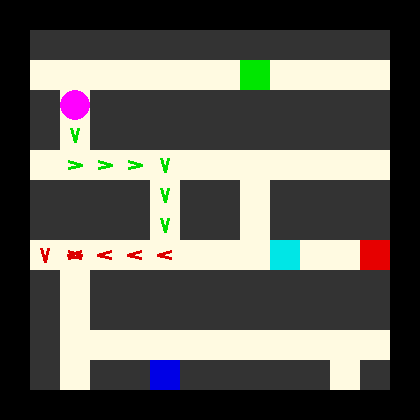

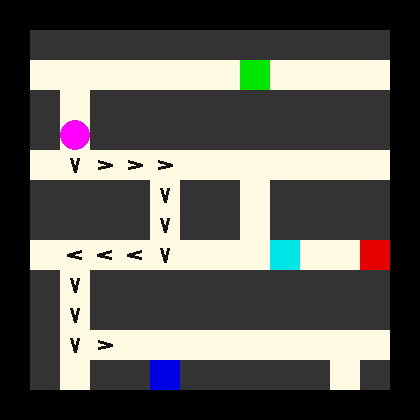

In [664]:
ROWS = 12
COLS = 12
draw_pandas_map(ROWS, COLS, simple_map, initial_2, pred_2)
draw_pandas_map_full(ROWS, COLS, simple_map, full_2)